In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#data=pd.read_csv("C:\\Users\\Utsav\\Desktop\\Mxene\\ML_exp", sep=',',header=0)

url = "https://raw.githubusercontent.com/UtsavMurarka/MXene-machine-learning/master/anant_data_miner/post_midsem_work/data_physical_var_new.csv"

data=pd.read_csv(url, sep=',',header=0)
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,bandgap,nn1,nn2,nn3,nn4,nn5,np1,np2,np3,np4,np5,...,shell4,shell5,spheat1,spheat2,spheat3,spheat4,spheat5,mass_ms1,mass_ms2,mass_ms3,mass_ms4,mass_ms5,mol_ms1,mol_ms2,mol_ms3,mol_ms4,mol_ms5,ther_con1,ther_con2,ther_con3,ther_con4,ther_con5,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,label
0,3.26,0.0,0.0,-1.63,2.82,0.0,0.000000e+00,1.000000e-16,32.8,0.333,0.667,0.383,0.667,0.333,0.220,0.000,0.000,0.301,0.333,0.667,0.275,0.667,0.333,0.328,24.0,24.0,6.0,35.0,35.0,0.0,28,28,6,45,45,24,24,6,35,35,...,4,4,0.449,0.449,0.709,0.474,0.474,44.5,44.5,-6.2,-4.9,-4.9,231.4,231.4,-7.45,-78.3,-78.300,94,94,140.0,0.1200,0.1200,258.3,140.7,140.7,0.8,31.5,0.22962,0.43402,7.145108,5.701870,2381272.203,3122884.800,34.8,0.8,0.012408,745.290,25389.72250,3930.932320,0
1,3.13,0.0,0.0,-1.56,2.71,0.0,0.000000e+00,-2.000000e-16,35.6,0.333,0.667,0.374,0.000,0.000,0.296,0.333,0.667,0.270,0.667,0.333,0.322,0.667,0.333,0.244,24.0,24.0,6.0,35.0,1.0,0.0,28,28,6,45,0,24,24,6,35,1,...,4,1,0.449,0.449,0.709,0.474,14.304,44.5,44.5,-6.2,-4.9,-24.8,231.4,231.4,-7.45,-78.3,-4.999,94,94,140.0,0.1200,0.1805,334.8,198.5,198.5,2.0,42.7,0.29255,0.32078,9.682327,9.898093,2580607.337,3428851.696,34.8,2.0,38.010333,1018.517,21404.72830,3928.950830,0
2,3.24,0.0,0.0,-1.62,2.81,0.0,1.000000e-16,-2.000000e-16,33.1,0.667,0.333,0.220,0.000,0.000,0.302,0.333,0.667,0.379,0.333,0.667,0.274,0.667,0.333,0.330,24.0,24.0,6.0,17.0,35.0,0.0,28,28,6,18,45,24,24,6,17,35,...,3,4,0.449,0.449,0.709,0.479,0.474,44.5,44.5,-6.2,-7.2,-4.9,231.4,231.4,-7.45,-51.5,-78.300,94,94,140.0,0.0089,0.1200,207.0,113.7,113.7,0.8,31.5,0.25133,0.50222,8.639936,9.891952,2452493.793,3209994.998,22.0,0.8,0.012320,768.773,23683.50050,3934.574869,0
3,3.18,0.0,0.0,-1.59,2.75,0.0,0.000000e+00,-1.000000e-16,34.6,0.000,0.000,0.301,0.333,0.667,0.376,0.667,0.333,0.226,0.333,0.667,0.274,0.667,0.333,0.328,24.0,24.0,6.0,17.0,17.0,0.0,28,28,6,18,18,24,24,6,17,17,...,3,3,0.449,0.449,0.709,0.479,0.479,44.5,44.5,-6.2,-7.2,-7.2,231.4,231.4,-7.45,-51.5,-51.500,94,94,140.0,0.0089,0.0089,82.8,54.3,54.3,0.7,31.5,0.27135,0.56642,10.001639,13.110595,2522836.664,3296242.342,2.8,0.7,0.012230,791.727,21905.45450,3938.216184,0
4,3.10,0.0,0.0,-1.55,2.68,0.0,0.000000e+00,2.000000e-16,36.4,0.000,0.000,0.297,0.333,0.667,0.369,0.333,0.667,0.270,0.667,0.333,0.323,0.667,0.333,0.245,24.0,24.0,6.0,17.0,1.0,0.0,28,28,6,18,0,24,24,6,17,1,...,3,1,0.449,0.449,0.709,0.479,14.304,44.5,44.5,-6.2,-7.2,-24.8,231.4,231.4,-7.45,-51.5,-4.999,94,94,140.0,0.0089,0.1805,162.0,110.3,110.3,1.7,42.7,0.31023,0.40418,10.971248,13.115764,2649467.851,3513066.327,9.2,1.7,38.003330,1037.423,19502.05962,3932.594051,0


In [0]:
#drop band gap column
data = data.drop('bandgap', axis=1)
print(np.shape(data))

(3079, 132)


In [0]:
mxene=data.values
mxene=np.array(mxene)
#split the data

train, test = train_test_split(data, test_size=0.2)
train=np.array(train)
test=np.array(test)
NegativeCount=0
PositiveCount=0
for i in range(len(train)):
    if train[i][131]==0 :
        NegativeCount=NegativeCount+1
    if train[i][131]==1:
        PositiveCount=PositiveCount+1
print(NegativeCount)
print(PositiveCount)
print(PositiveCount+NegativeCount)
positives=np.zeros((PositiveCount,132))
negatives=np.zeros((NegativeCount,132))
    
j=0
k=0
    
for i in range(len(train)):

    if(train[i,131] == 1):
        positives[j,:] = train[i,:]
        j=j+1
    if(train[i,131] == 0):
        negatives[k,:] = train[i,:]
        k=k+1

print(np.shape(train))
print(np.shape(test))

2159
304
2463
(2463, 132)
(616, 132)


In [0]:
y_train=np.zeros(len(train))
y_test=np.zeros(len(test))

for i in range(len(test)):
    y_test[i]=test[i][131]
    test[i][131]=1

for i in range(len(train)):
    y_train[i]=train[i][131]
    train[i][131]=1

train = np.delete(train, 131, 1)
test = np.delete(test, 131, 1)

train = np.delete(train, 130, 1)
test = np.delete(test, 130, 1)

print(np.shape(train))
print(np.shape(test))

(2463, 130)
(616, 130)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [0]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def build_model():
  model = Sequential()
  model.add(Dropout(0.1, input_shape=(130,)))
  model.add(Dense(130, input_dim=130, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

weights = {0:2159 ,1: 304}
keras_model = build_model()
keras_model.fit(train, y_train, epochs=100, batch_size=20, verbose=1, class_weight = weights)

Epoch 1/100
2463/2463 [==============================] - 0s 150us/step - loss: 208.5045 - accuracy: 0.8762
Epoch 2/100
2463/2463 [==============================] - 0s 98us/step - loss: 174.3323 - accuracy: 0.8766
Epoch 3/100
2463/2463 [==============================] - 0s 97us/step - loss: 161.9504 - accuracy: 0.8766
Epoch 4/100
2463/2463 [==============================] - 0s 99us/step - loss: 162.6739 - accuracy: 0.8766
Epoch 5/100
2463/2463 [==============================] - 0s 96us/step - loss: 156.2256 - accuracy: 0.8758
Epoch 6/100
2463/2463 [==============================] - 0s 96us/step - loss: 151.3662 - accuracy: 0.8766
Epoch 7/100
2463/2463 [==============================] - 0s 96us/step - loss: 143.4219 - accuracy: 0.8770
Epoch 8/100
2463/2463 [==============================] - 0s 96us/step - loss: 148.1467 - accuracy: 0.8762
Epoch 9/100
2463/2463 [==============================] - 0s 97us/step - loss: 140.7558 - accuracy: 0.8770
Epoch 10/100
2463/2463 [=====================

In [0]:
_, accuracy = keras_model.evaluate(test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = keras_model.evaluate(train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

616/616 [==============================] - 0s 77us/step
Accuracy: 93.67
2463/2463 [==============================] - 0s 28us/step
Accuracy: 98.05


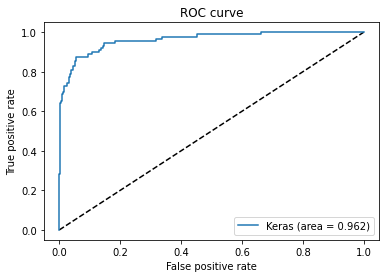

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
keras_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_24 (Dropout)         (None, 130)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 130)               17030     
_________________________________________________________________
dropout_25 (Dropout)         (None, 130)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 250)               32750     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 251       
Total params: 50,031
Trainable params: 50,031
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_pred = keras_model.predict(test)
for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    y_pred[i]=1
  else:
    y_pred[i]=0
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[526   1]
 [ 38  51]]
